# Instruction

The dataset we will use here is a simulated dataset of online purchase behavior.
 The data comes from kaggle:

https://www.kaggle.com/rakeshrau/social-network-ads

There are three predictors:
- `Gender`
- `Age`
- `EstimatedSalary`

The output is `Purchased`





In [1]:
!wget https://www.dropbox.com/s/p1fep0smi4k19ry/Social_Network_Ads.csv

--2020-12-15 15:11:51--  https://www.dropbox.com/s/p1fep0smi4k19ry/Social_Network_Ads.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p1fep0smi4k19ry/Social_Network_Ads.csv [following]
--2020-12-15 15:11:51--  https://www.dropbox.com/s/raw/p1fep0smi4k19ry/Social_Network_Ads.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd3fa9f3b7fffbe83cc344ac83.dl.dropboxusercontent.com/cd/0/inline/BFEZSmUufPtAK0t0cz9wrjPOKoD4UWHHxsAJyek6-FGcobFgATuxFjRwqBS1s-iz3ckES4A5aXYPAsFTAxSCSa-XabBWCWaPWKBA4LevBnJI8XGsMcw-saWB2dADW1k7OjM/file# [following]
--2020-12-15 15:11:51--  https://ucfd3fa9f3b7fffbe83cc344ac83.dl.dropboxusercontent.com/cd/0/inline/BFEZSmUufPtAK0t0cz9wrjPOKoD4UWHHxsAJyek6-FGcobFgATuxFjRwqBS1s-iz3ckES4A5aXYPAsFTA

## Import basic packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [3]:
df_sn = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df_sn.head(10)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

In [6]:
df_sn.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

## Visualise the data

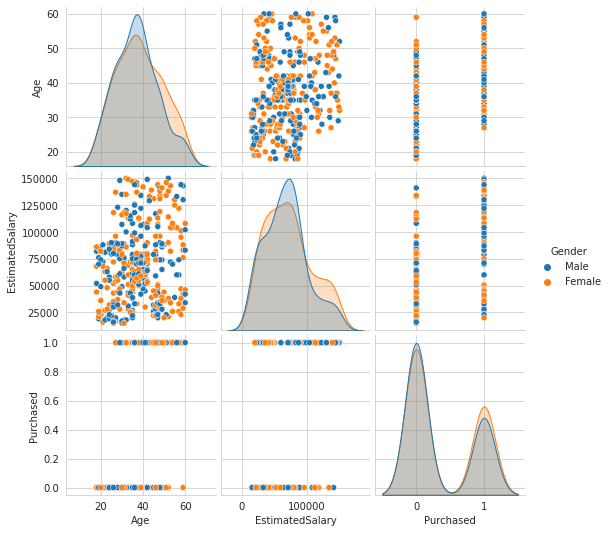

In [7]:
sns.set_style("whitegrid")
sns.pairplot(df_sn.drop("User ID", axis = 1), hue = "Gender")

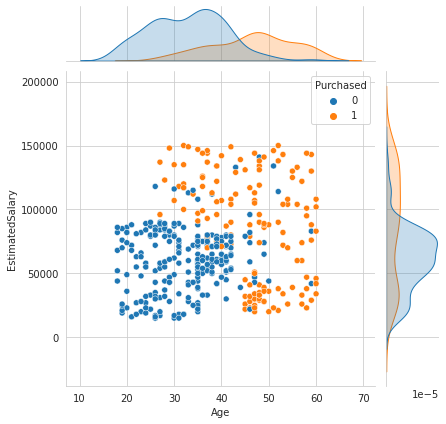

In [8]:
sns.jointplot(x = "Age", y = "EstimatedSalary", hue = 'Purchased', 
              data = df_sn)

In [9]:
pd.get_dummies(df_sn['Gender'])

Female  Male
0         0     1
1         0     1
2         1     0
3         1     0
4         0     1
..      ...   ...
395       1     0
396       0     1
397       1     0
398       0     1
399       1     0

[400 rows x 2 columns]

In [10]:
df_sn['Gender'] = pd.get_dummies(df_sn['Gender'])[['Female']]

## Train-Test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_sn.iloc[:, 1:4]
print(X)
y = df_sn['Purchased']
print(y)


     Gender  Age  EstimatedSalary
0         0   19            19000
1         0   35            20000
2         1   26            43000
3         1   27            57000
4         0   19            76000
..      ...  ...              ...
395       1   46            41000
396       0   51            23000
397       1   50            20000
398       0   36            33000
399       1   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(280, 3)
(120, 3)


In [15]:
X_train

Gender  Age  EstimatedSalary
157       0   29            75000
109       1   38            80000
17        0   45            26000
347       1   54           108000
24        0   46            23000
..      ...  ...              ...
71        1   24            27000
106       1   26            35000
270       1   43           133000
348       0   39            77000
102       1   32            86000

[280 rows x 3 columns]

## Data Wrangling

- Here we scale the variables using StandardScaler, which normalizes variables

In [16]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [17]:
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

In [18]:
X_train

array([[-1.02166316, -0.84252154,  0.1301563 ],
       [ 0.97879618,  0.04175763,  0.2777019 ],
       [-1.02166316,  0.72953032, -1.31579061],
       [ 0.97879618,  1.61380949,  1.10395728],
       [-1.02166316,  0.82778356, -1.40431797],
       [ 0.97879618, -1.43204099, -1.25677236],
       [-1.02166316, -0.05649561,  0.1301563 ],
       [-1.02166316,  0.43477059, -0.16493491],
       [ 0.97879618, -0.2530021 ,  0.01211982],
       [ 0.97879618,  1.31904976,  2.22530386],
       [-1.02166316,  0.14001087,  0.74984783],
       [ 0.97879618, -1.33378775,  0.54328399],
       [ 0.97879618,  2.00682245,  0.72033871],
       [-1.02166316, -1.23553451, -1.43382709],
       [-1.02166316,  0.33651735, -0.34198963],
       [-1.02166316, -0.94077478,  0.54328399],
       [ 0.97879618,  0.43477059,  0.2777019 ],
       [ 0.97879618,  0.43477059,  1.10395728],
       [ 0.97879618,  0.82778356,  0.74984783],
       [ 0.97879618,  0.9260368 ,  1.25150288],
       [ 0.97879618, -0.44950858, -1.256

## Fit logistic model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logitmod = LogisticRegression()

In [21]:
logitmod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model evaluations

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
pred_logit = logitmod.predict(X_test)
pred_logit

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [24]:
confusion_matrix(y_test, pred_logit)

array([[71,  2],
       [15, 32]])

In [25]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



## KNN classifier


In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [27]:
knnmod = KNeighborsClassifier(n_neighbors = 2)
knnmod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [28]:
pred_knn = knnmod.predict(X_test)
pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [29]:
confusion_matrix(y_test, pred_knn)

array([[71,  2],
       [19, 28]])

In [30]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



In [31]:
pred_logit = logitmod.predict(X_test)
pred_logit

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [32]:
confusion_matrix(y_test, pred_logit)

array([[71,  2],
       [15, 32]])

In [33]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        73
           1       0.93      0.60      0.73        47

    accuracy                           0.82       120
   macro avg       0.86      0.78      0.80       120
weighted avg       0.85      0.82      0.81       120



### Parameter tuning for KNN

- Parameter tuning will be done using cross-validation
- Reestimate the models for the different values of tuning parameters
  - For KNN, try different values of _k_
- By default, for classification tasks
- For more information, see Chapter 5 of Gareth et al




In [34]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn2, param_grid, cv=5, verbose = 2)
#fit model to data
knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=9, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [35]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)


0.9071428571428571
{'n_neighbors': 5}


In [36]:
pred_knn = knn_cv.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



### Final model

In [37]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

In [38]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv2 = GridSearchCV(knn2, param_grid, cv=10, scoring=f1)
#fit model to data
knn_cv2.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=binary, pos_label=1),
             verbose=0)

In [39]:
knn_cv2.best_params_

{'n_neighbors': 7}

In [40]:
predict_knn2 = knn_cv2.predict(X_test)
confusion_matrix(y_test, predict_knn2)

array([[68,  5],
       [ 4, 43]])

In [41]:
print(classification_report(y_test, predict_knn2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.90      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120

